In [2]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
from collections import Counter


In [3]:
# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the dataset
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')


In [5]:
# Download stopwords dataset
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kavan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# Drop unnecessary columns
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)


In [7]:
# Rename columns
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)


In [8]:
# Drop duplicates
df.drop_duplicates(inplace=True)


In [9]:
# Data exploration
print(df.info(), df.describe(), df.shape, df['Category'].value_counts(), sep='\n')


<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5169 non-null   object
 1   Message   5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB
None
       Category                                            Message
count      5169                                               5169
unique        2                                               5169
top         ham  Go until jurong point, crazy.. Available only ...
freq       4516                                                  1
(5169, 2)
Category
ham     4516
spam     653
Name: count, dtype: int64


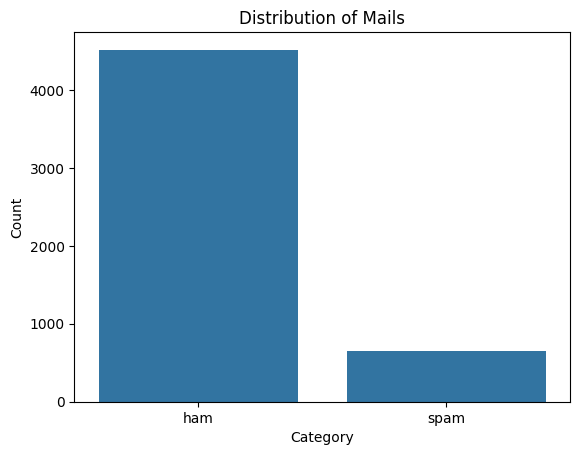

In [10]:
# Data visualization - Distribution of mails
sns.countplot(data=df, x='Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Mails')
plt.show()


In [11]:
# Convert the "Category" column values to numerical representation (0 for "spam" and 1 for "ham")
df['Category'] = df['Category'].map({'spam': 0, 'ham': 1})


In [12]:
# Separate features (X) and target (Y) data
X = df["Message"]
Y = df["Category"]


In [13]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [14]:
# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)


In [15]:
# Convert training and testing text messages into numerical features using TF-IDF
X_train_features = tfidf_vectorizer.fit_transform(X_train)
X_test_features = tfidf_vectorizer.transform(X_test)


In [16]:
# Logistic Regression model
model = LogisticRegression()
model.fit(X_train_features, Y_train)


LogisticRegression()

In [17]:
# Model evaluation on training data
accuracy_on_training_data = accuracy_score(Y_train, model.predict(X_train_features))
print("Accuracy on training data:", accuracy_on_training_data)


Accuracy on training data: 0.9610640870616687


In [18]:
# Model evaluation on test data
accuracy_on_test_data = accuracy_score(Y_test, model.predict(X_test_features))
print("Accuracy on test data:", accuracy_on_test_data)


Accuracy on test data: 0.9642166344294004


In [19]:
# Test the model with custom email messages
def predict_category(mail):
    input_mail = [mail]
    input_data_features = tfidf_vectorizer.transform(input_mail)
    prediction = model.predict(input_data_features)
    return "Ham Mail" if prediction[0] == 1 else "Spam Mail"
print(predict_category("Congratulations! You've won a free vacation to an exotic island. Just click on the link below to claim your prize."))
print(predict_category("This is a friendly reminder about our meeting scheduled for tomorrow at 10:00 AM in the conference room. Please make sure to prepare your presentation and bring any necessary materials."))


Spam Mail
Ham Mail


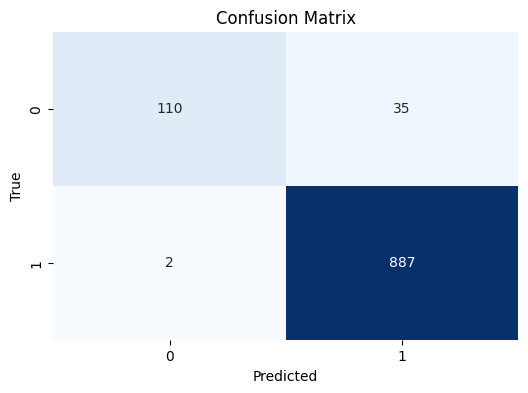

In [20]:
# Data visualization - Confusion Matrix
cm = confusion_matrix(Y_test, model.predict(X_test_features))
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [21]:
# Data visualization - Top 10 Most Common Words
stop_words = set(stopwords.words('english'))

def plot_most_common_words(words, title, color):
    word_freq = Counter([word.lower() for word in words if word.lower() not in stop_words and word.isalpha()])
    plt.figure(figsize=(10, 6))
    plt.bar(*zip(*word_freq.most_common(10)), color=color)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()


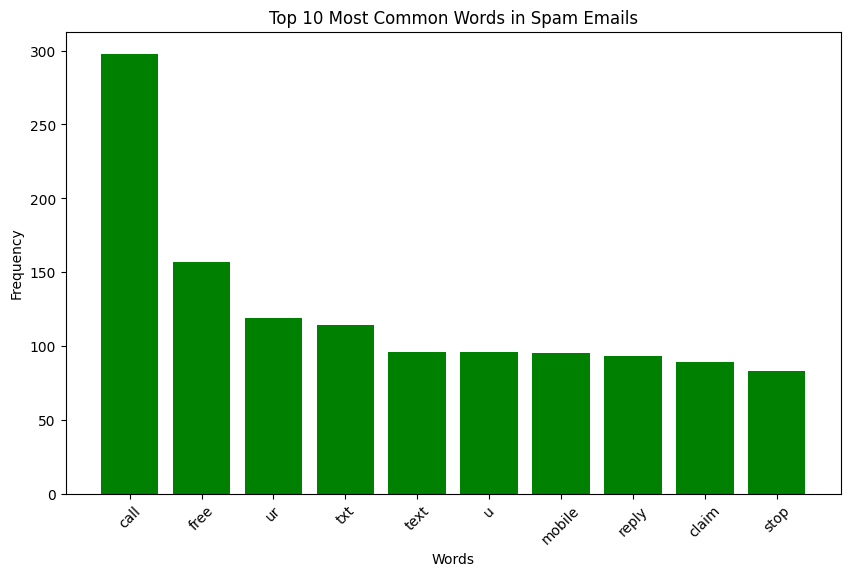

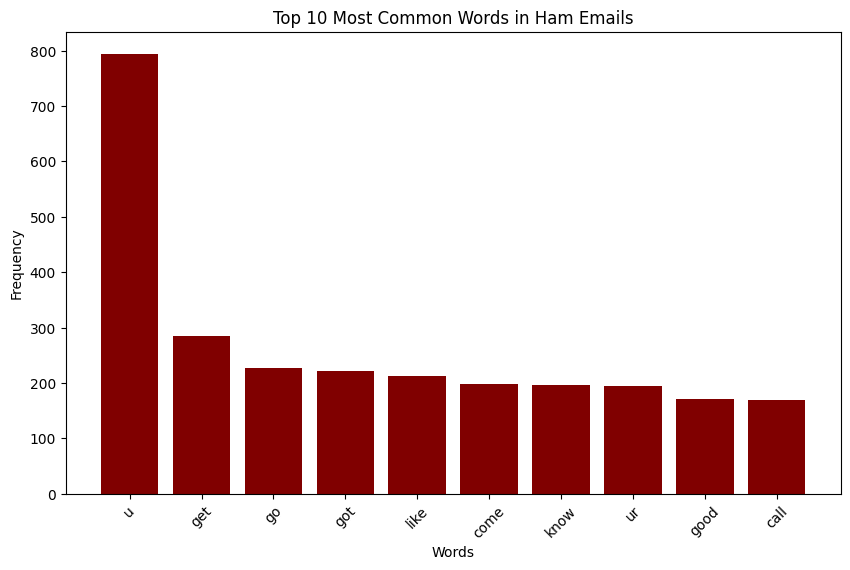

In [22]:
# Top 10 Most Common Words in Spam Emails
spam_words = " ".join(df[df['Category'] == 0]['Message']).split()
plot_most_common_words(spam_words, 'Top 10 Most Common Words in Spam Emails', 'g')

# Top 10 Most Common Words in Ham Emails
ham_words = " ".join(df[df['Category'] == 1]['Message']).split()
plot_most_common_words(ham_words, 'Top 10 Most Common Words in Ham Emails', 'maroon')
